In [1]:
%matplotlib inline

## [Receiver Operating Characteristic (ROC) curve plots](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
- Used to evaluate classifier output quality
- Usually designed with *true positive rate* (TPR) on the Y-axis, and *false positive rate* (FPR) on the X-axis. The "ideal" point (FPR = 0 and TPR = 1) is therefore in the top left corner of the plot.
- Steepness is important - the goal is maximize TPR and minimize FPR.
- Below: ROC from different K-fold cross validation settings.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

In [3]:
# Iris + noise
iris                  = datasets.load_iris()
X, y                  = iris.data, iris.target
X, y                  = X[y != 2], y[y != 2]
n_samples, n_features = X.shape
random_state          = np.random.RandomState(0)
X                     = np.c_[X, 
                              random_state.randn(
                                  n_samples, 
                                  200 * n_features)]

In [4]:
cv         = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', 
                     probability=True,
                     random_state=random_state)

tprs, aucs, mean_fpr = [], [], np.linspace(0, 1, 100)

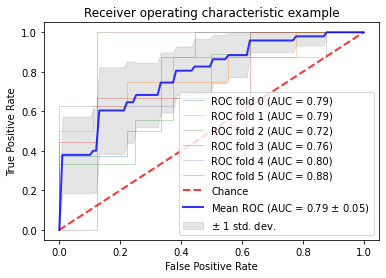

In [5]:

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()